In [95]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [96]:
df = pd.read_csv("data/1.32.csv")

## normalization

In [97]:
df["userTime"] = df["userTime"].astype(pd.Timestamp)
df["serverTime"] = df["serverTime"].astype(np.datetime64)
df["gameVersion"] = df["gameVersion"].astype(str)


In [98]:
df.head()

,id,serverTime,userTime,gameVersion,playerId,playerBirthdate,playerRegion,playerCountry,playerGender,playerExternalId,...,type,coordinates,section,customData.language,customData.controls,customData.device,customData.sound,customData.gamelevel,customData,customData.dnabit
0,13815a6e-da1d-4b1d-862f-6e394a4cec98,2015-09-10 12:32:45.204,2015-09-10T12:32:48.469Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,2bb4a2ab-eaf1-4e0e-b2fe-5f5e88248733,NaN,NaN,NaN,NaN,NaN,...,start,"[-6, 143]",NaN,NaN,NaN,NaN,NaN,NaN,null,NaN
1,36963346-0445-45ce-bad0-b767325becb2,2015-09-10 12:32:45.212,2015-09-10T12:32:48.481Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,8565a7b9-811b-4b56-9cae-c7eeb28314d7,NaN,NaN,NaN,NaN,NaN,...,start,"[-6, 143]",NaN,NaN,NaN,NaN,NaN,NaN,null,NaN
2,7705c2aa-1de0-40c2-8cea-71e60b326f54,2015-09-10 12:33:35.665,2015-09-10T12:33:38.935Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,8565a7b9-811b-4b56-9cae-c7eeb28314d7,NaN,NaN,NaN,NaN,NaN,...,reach,"[-6, 134]",Checkpoint01,NaN,NaN,NaN,NaN,NaN,null,NaN
3,b327e325-bf7d-4ecc-9c7c-ab9b3894eedd,2015-09-10 13:41:43.245,2015-09-10T13:41:46.501Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,4d9c1137-d582-4333-b264-e59eebd2b6d8,NaN,NaN,NaN,NaN,NaN,...,start,"[-6, 143]",NaN,NaN,NaN,NaN,NaN,NaN,null,NaN
4,d00eb541-9be1-4483-b622-f72b30507adb,2015-09-10 13:41:53.529,2015-09-10T13:41:56.785Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,4d9c1137-d582-4333-b264-e59eebd2b6d8,NaN,NaN,NaN,NaN,NaN,...,reach,"[-4, 134]",Checkpoint01,NaN,NaN,NaN,NaN,NaN,null,NaN


## Unique Game Sessions

Number of unique game sessions

In [99]:
playerscount = df["playerId"].nunique()
playerscount

184

## Generic Treatment

Generic graph treatment

In [100]:
def genericTreatment( table, graphKind, xlabel, ylabel, isXPercentage=False, isYPercentage=False, xTotalCount=0, yTotalCount=0 ):
        
    if graphKind is None:
        ax = table.plot()
    else:
        ax = table.plot(kind=graphKind)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend('') 
    
    if isXPercentage:
        xvals = ax.get_xticks()
        ax.set_xticklabels(['{:3.2f}%'.format((x*100)/(xTotalCount-1)) for x in xvals])
        
    if isYPercentage: 
        yvals = ax.get_yticks()
        ax.set_yticklabels(['{:3.2f}%'.format((x*100)/(yTotalCount-1)) for x in yvals])
    
    return

gameSessionCount=184
#craft=70
mean=0.380434782609


,crafts
count,183.000000
mean,0.382514
std,1.987909
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,18.000000


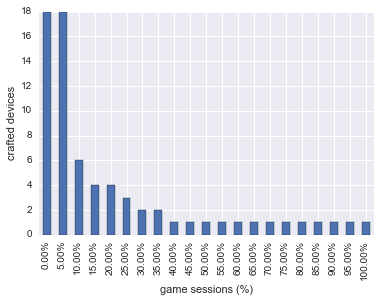

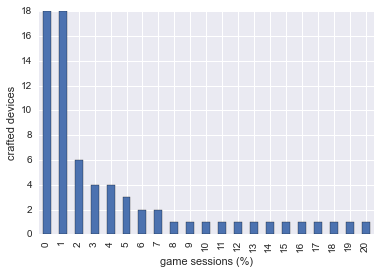

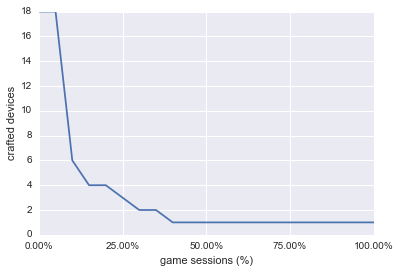

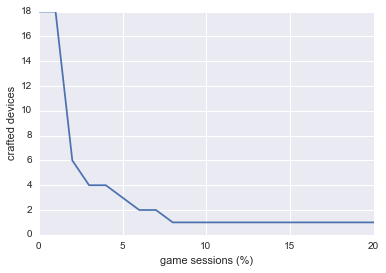

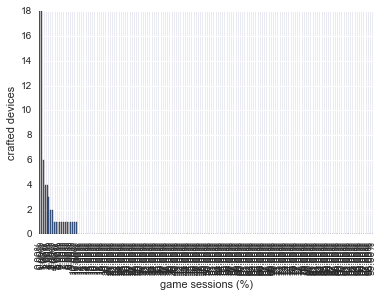

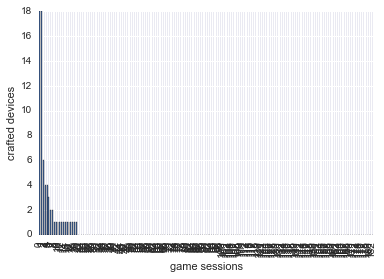

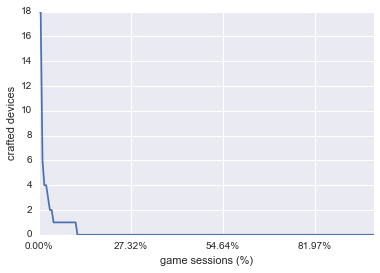

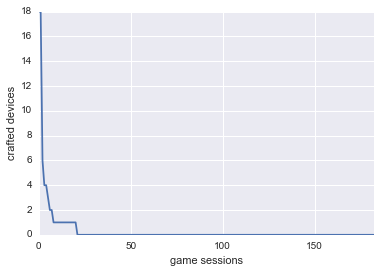

In [106]:
gameSessionCount = df["playerId"].nunique()
print 'gameSessionCount={0}'.format(gameSessionCount)


studiedEvent = "craft"

percentageBarGraphMode = True
barGraphMode = True
percentageDefaultGraphMode = True
defaultGraphMode = True


columnName = studiedEvent+"s"
graphLabel = "crafted devices"

studiedEventCount = df[df["type"]==studiedEvent]["id"].count()
print '#{0}={1}'.format(studiedEvent,studiedEventCount)
mean = studiedEventCount / float(gameSessionCount)
print 'mean={0}'.format(mean)

positiveGameSessions = df[df["type"]==studiedEvent]["playerId"].value_counts()

positiveGameSessionCount = positiveGameSessions.count()
positiveGameSessionCountTable = pd.DataFrame({columnName: positiveGameSessions.values})

if percentageBarGraphMode:
    genericTreatment( positiveGameSessionCountTable, 'bar', "game sessions (%)", graphLabel,
                     True, False, positiveGameSessionCount )
if barGraphMode:
    genericTreatment( positiveGameSessionCountTable, 'bar', "game sessions (%)", graphLabel)
if percentageDefaultGraphMode:
    genericTreatment( positiveGameSessionCountTable, None, "game sessions (%)", graphLabel,
                     True, False, positiveGameSessionCount )
if defaultGraphMode:
    genericTreatment( positiveGameSessionCountTable, None, "game sessions (%)", graphLabel)

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

positiveGameSessionCountTable.describe()

negativeGameSessionCountSeries = pd.Series(0, index=(list(range(positiveGameSessionCount,gameSessionCount-1))))
negativeGameSessionCountTable = pd.DataFrame({columnName: negativeGameSessionCountSeries})

fullEventGameSessionCountTable = pd.concat([positiveGameSessionCountTable, negativeGameSessionCountTable]) 
    
if percentageBarGraphMode:
    genericTreatment( fullEventGameSessionCountTable, 'bar', "game sessions (%)", graphLabel,
                     True, False, gameSessionCount )
if barGraphMode:
    genericTreatment( fullEventGameSessionCountTable, 'bar', "game sessions", graphLabel)
if percentageDefaultGraphMode:
    genericTreatment( fullEventGameSessionCountTable, None, "game sessions (%)", graphLabel,
                     True, False, gameSessionCount )
if defaultGraphMode:
    genericTreatment( fullEventGameSessionCountTable, None, "game sessions", graphLabel)

fullEventGameSessionCountTable.describe()

In [ ]:
print positiveGameSessionCountTable

## Test: Axes' Labels

In [ ]:
gameSessionCount = df["playerId"].nunique()
print 'gameSessionCount={0}'.format(gameSessionCount)


studiedEvent = "craft"

percentageBarGraphMode = True
barGraphMode = True
percentageDefaultGraphMode = True
defaultGraphMode = True



columnName = studiedEvent+"s"
graphLabel = columnName

studiedEventCount = df[df["type"]==studiedEvent]["id"].count()
print '#{0}={1}'.format(studiedEvent,studiedEventCount)
mean = studiedEventCount / float(gameSessionCount)
print 'mean={0}'.format(mean)

positiveGameSessions = df[df["type"]==studiedEvent]["playerId"].value_counts()

positiveGameSessionCount = positiveGameSessions.count()
positiveGameSessionCountTable = pd.DataFrame({columnName: positiveGameSessions.values})

ax = positiveGameSessionCountTable.plot()
plt.xlabel("game sessions (%)")
plt.ylabel(graphLabel)
plt.legend('')

xvals = ax.get_xticks()
yvals = ax.get_yticks()
#percentage on y axis
#ax.set_yticklabels(['{:3.2f}%'.format(x*100/studiedEventCount) for x in vals])
#percentage on x axis
ax.set_xticklabels(['{:3.2f}%'.format((x*100)/(positiveGameSessionCount-1)) for x in xvals])

ax = positiveGameSessionCountTable.plot()
plt.xlabel("game sessions")
plt.ylabel(graphLabel)
plt.legend('')

print '#positiveGameSession={0}'.format(positiveGameSessionCount)